In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from MultiTayDDF import *
import time

# Lorenz 1963

In [2]:
par = np.array([10,28,8/3])

x0 = np.array([1,0.2,19])
t = np.arange(0,500,0.002)

#lorenz63 model
def lorenz63(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*(-x + y),
        x*(par[1] - z) - y,
        -par[2]*z + x*y]
    return dXdt
solL63 = odeint(lorenz63,x0,t)

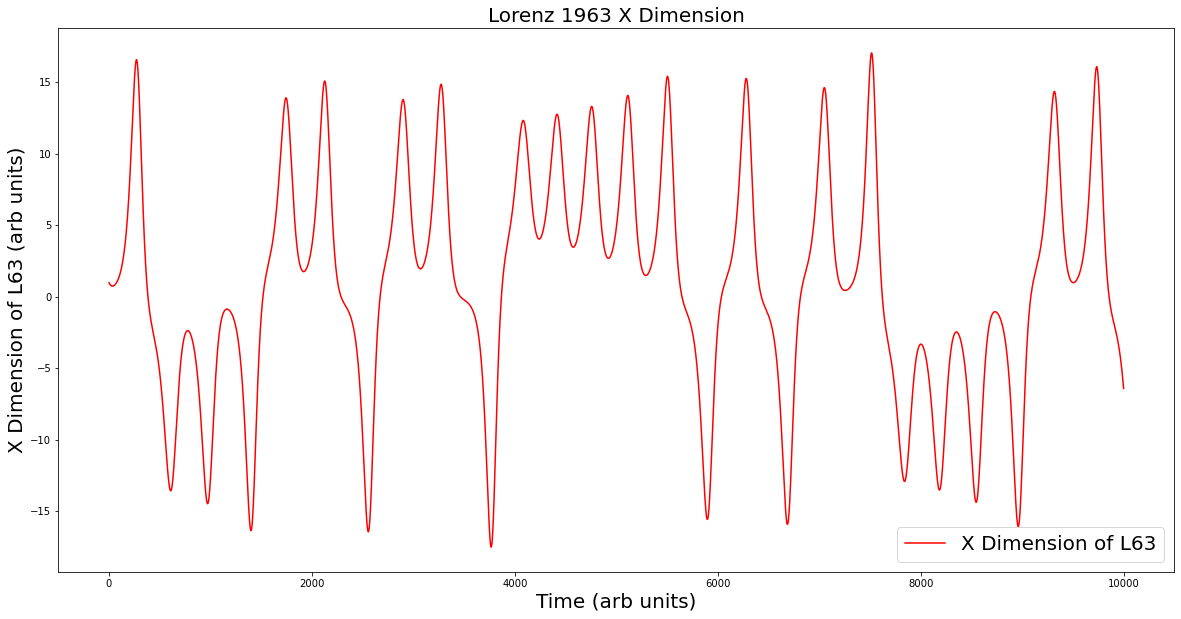

In [3]:
plt.figure(figsize=(20,10))
plt.plot(solL63.T[0][0:10000],color = 'r',label = 'X Dimension of L63')
plt.xlabel('Time (arb units)',fontsize=20)
plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Lorenz 1963 X Dimension',fontsize=20)
#plt.savefig('L63 Update Graph')
plt.show()

In [4]:
D = 3
T = 2

TM = MultiTaylorRC(D,T)

In [10]:
Train_Data = solL63.T
trainlength = 10000
PredLength = 20000
beta = 9.25874871890625

start_time = time.time()
TM.train(Train_Data,trainlength,beta)
pred = TM.predict(PredLength)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.7895488739013672 seconds ---


In [13]:
Train_Data = solL63.T
trainlength = 10000
PredLength = 20000

start_time = time.time()
TM.train(Train_Data,trainlength,beta)
pred = TM.predict(PredLength)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.7726609706878662 seconds ---


In [14]:
Lyap_large = 0.9056
maxx = PredLength
X = np.arange(0,maxx*0.002*Lyap_large,0.002*Lyap_large)

9.25874871890625


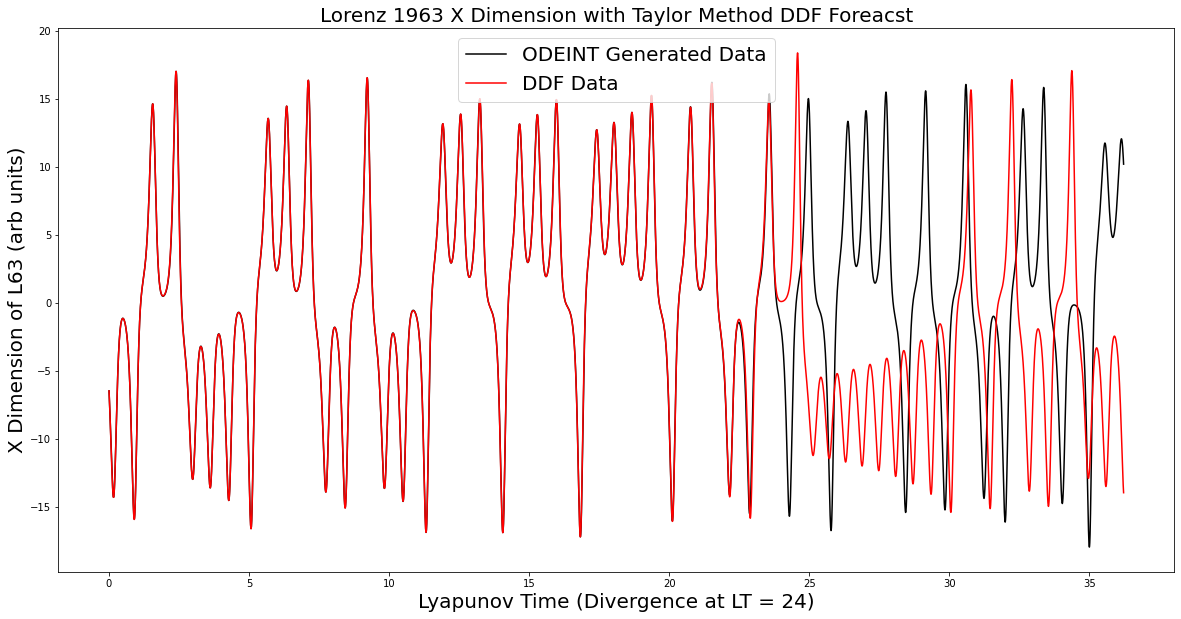

In [15]:
print(beta)
plt.figure(figsize=(20,10))
plt.plot(X,Train_Data[0,trainlength:trainlength+PredLength],color = 'black',label = 'ODEINT Generated Data')
plt.plot(X,pred.T[0],color = 'r',label = 'DDF Data')
plt.xlabel('Lyapunov Time (Divergence at LT = 24)',fontsize=20)
plt.ylabel('X Dimension of L63 (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Lorenz 1963 X Dimension with Taylor Method DDF Foreacst',fontsize=20)
plt.savefig('L63 Taylor Method')
plt.show()

# Colpitts Oscillator

In [16]:
#Let's start with the Colpitts Oscillator
par = np.array([5,0.0797,0.6898,6.2723]) #Alpha, gamma, q, eta

x0 = np.array([1,0.2,4])
t = np.arange(0,1000,0.02)

#lorenz63 model
def colpit(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*y,
        -par[1]*(x+z)-y*par[2],
        par[3]*(y+1-np.exp(-x))]
    return dXdt
solCol = odeint(colpit,x0,t)

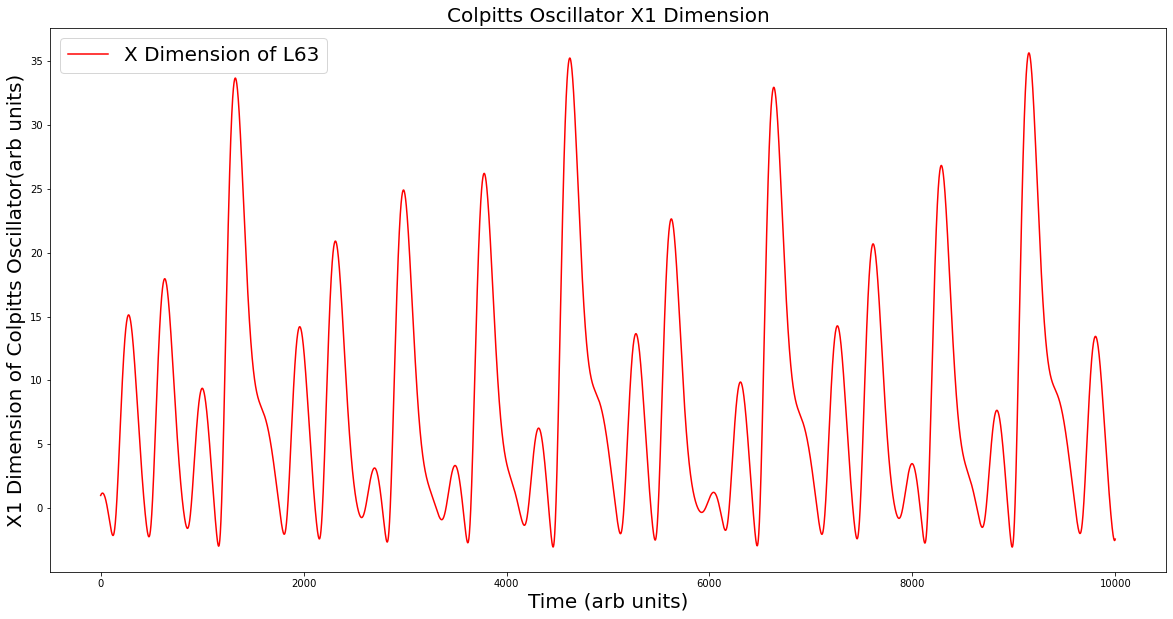

In [17]:
plt.figure(figsize=(20,10))
plt.plot(solCol.T[0][0:10000],color = 'r',label = 'X Dimension of L63')
plt.xlabel('Time (arb units)',fontsize=20)
plt.ylabel('X1 Dimension of Colpitts Oscillator(arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Colpitts Oscillator X1 Dimension',fontsize=20)
#plt.savefig('L63 Update Graph')
plt.show()

In [18]:
D = 3
T = 2

TM = MultiTaylorRC(D,T)

In [19]:
Train_Data = solCol.T
trainlength = 10000
PredLength = 5000
beta = 10**(-20+50/4)

start_time = time.time()
TM.train(Train_Data,trainlength,beta)
pred = TM.predict(PredLength)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6816179752349854 seconds ---


In [21]:
Lyap_large = 0.07
maxx = PredLength
X = np.arange(0,maxx*0.02*Lyap_large,0.02*Lyap_large)

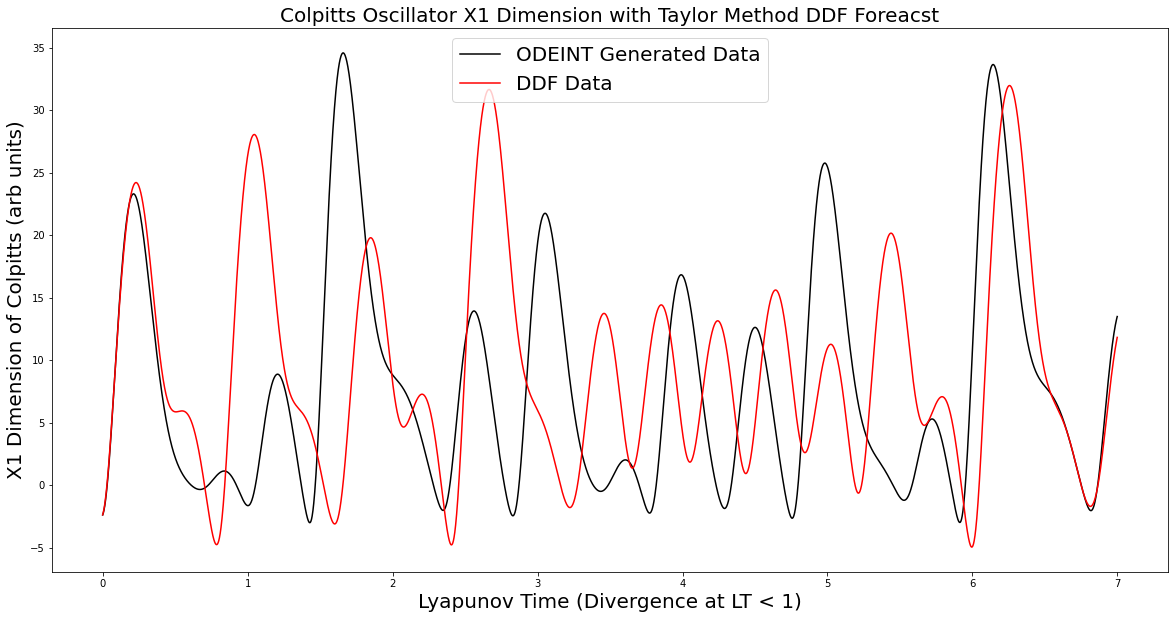

In [22]:
plt.figure(figsize=(20,10))
plt.plot(X,Train_Data[0,trainlength:trainlength+PredLength],color = 'black',label = 'ODEINT Generated Data')
plt.plot(X,pred.T[0],color = 'r',label = 'DDF Data')
plt.xlabel('Lyapunov Time (Divergence at LT < 1)',fontsize=20)
plt.ylabel('X1 Dimension of Colpitts (arb units)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Colpitts Oscillator X1 Dimension with Taylor Method DDF Foreacst',fontsize=20)
plt.savefig('Colpitts Taylor Method')
plt.show()

# TSR Parameter Fitting

In [23]:
solL63.shape

(250000, 3)

In [24]:
D = 3
T = 2
beta = 9
TM = MultiTaylorRC(D,T)
Train_Data = solL63.T

In [26]:
num = 1000
Prams = np.zeros((num,3,13))
for i in range(num):
    trainlength = i*10
    TM.train(Train_Data,trainlength,beta)
    Prams[i] = TM.P

In [32]:
X = np.arange(0,10000,10)

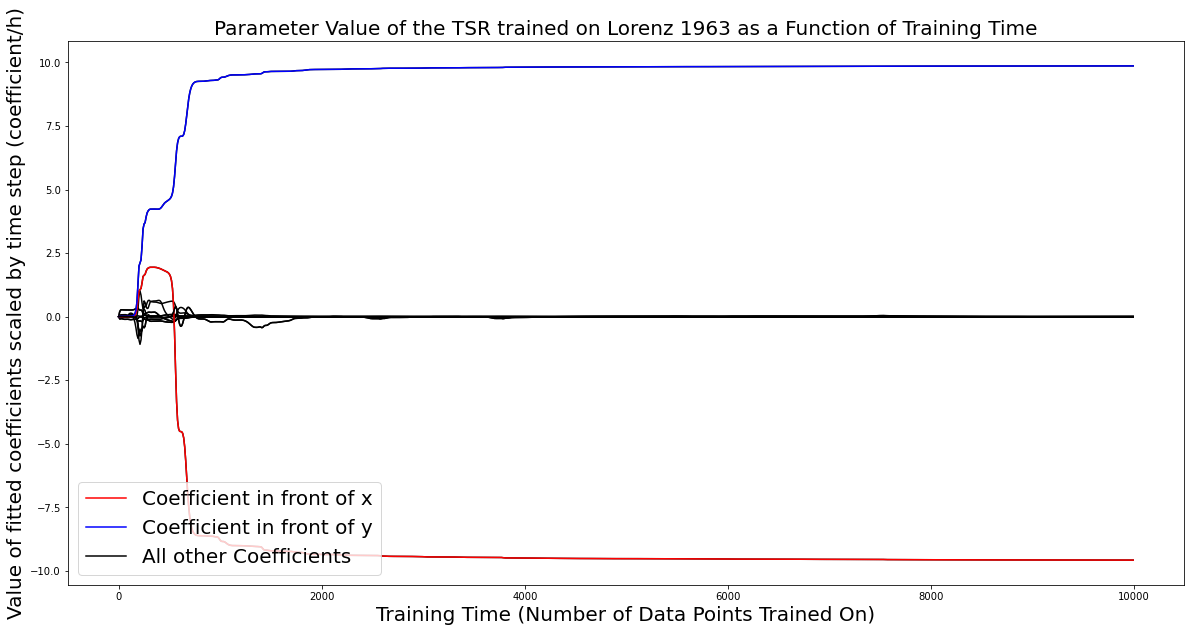

In [34]:
plt.figure(figsize=(20,10))
for i in range(13):
    plt.plot(X,Prams[:,0,i]/0.002,color = 'black')
plt.plot(X,Prams[:,0,1]/0.002,color = 'red',label = 'Coefficient in front of x')
plt.plot(X,Prams[:,0,2]/0.002,color = 'blue',label = 'Coefficient in front of y')
plt.plot(X,Prams[:,0,0]/0.002,color = 'black',label = 'All other Coefficients')
plt.xlabel('Training Time (Number of Data Points Trained On)',fontsize=20)
plt.ylabel('Value of fitted coefficients scaled by time step (coefficient/h)',fontsize=20)
plt.legend(fontsize=20)
plt.title('Parameter Value of the TSR trained on Lorenz 1963 as a Function of Training Time',fontsize=20)
plt.savefig('TSR Coefficient Graph')
plt.show()

In [35]:
Prams[500,0,:]/0.002

array([ 1.52491659e-02, -9.51495918e+00,  9.82442989e+00, -4.38914159e-03,
       -8.70079468e-04,  3.08320076e-04, -6.43987306e-03,  3.08320113e-04,
       -3.07206650e-05,  8.97638678e-04, -6.43987377e-03,  8.97638371e-04,
        1.42041917e-04])